In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# From Covid Tracking API
# https://covidtracking.com/api/
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

# https://github.com/COVID19Tracking/associated-data
f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [4]:
df_us = pd.read_json(api_us)
df_states = pd.read_json(api_states)
df_pop = pd.read_csv(f_pop)

In [5]:
df_us.shape

(23, 16)

In [6]:
df_states.shape

(1149, 15)

In [7]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [8]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [9]:
df_us.sort_values(by=['date']).tail()

,date,states,positive,negative,posNeg,pending,hospitalized,death,total,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
4,2020-03-22,56,31879,193463,225342,2842,2554.0,398.0,228184,2020-03-22T20:00:00Z,225342,126.0,590.0,37554.0,8682.0,46236.0
3,2020-03-23,56,42152,237321,279473,14571,3325.0,471.0,294044,2020-03-23T20:00:00Z,279473,73.0,771.0,43858.0,10273.0,54131.0
2,2020-03-24,56,51954,292758,344712,14433,4468.0,675.0,359145,2020-03-24T20:00:00Z,344712,204.0,1143.0,55437.0,9802.0,65239.0
1,2020-03-25,56,63928,357604,421532,51235,6136.0,900.0,472767,2020-03-25T20:00:00Z,421532,225.0,1668.0,64846.0,11974.0,76820.0
0,2020-03-26,56,80735,438603,519338,60251,10131.0,1163.0,579589,2020-03-26T20:00:00Z,519338,263.0,3995.0,80999.0,16807.0,97806.0


In [10]:
df_states.sort_values(by=['date']).tail()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
32,2020-03-26,NE,73.0,1584.0,NaN,NaN,0.0,1657,2020-03-26T20:00:00Z,1657,0.0,0.0,280.0,12.0,292.0
31,2020-03-26,ND,52.0,2039.0,NaN,10.0,0.0,2091,2020-03-26T20:00:00Z,2091,0.0,2.0,305.0,13.0,318.0
30,2020-03-26,NC,636.0,12274.0,NaN,29.0,2.0,12910,2020-03-26T20:00:00Z,12910,1.0,0.0,2289.0,132.0,2421.0
28,2020-03-26,MS,485.0,2291.0,NaN,150.0,6.0,2776,2020-03-26T20:00:00Z,2776,4.0,33.0,725.0,108.0,833.0
0,2020-03-26,AK,59.0,1801.0,NaN,3.0,1.0,1860,2020-03-26T20:00:00Z,1860,0.0,2.0,152.0,17.0,169.0


In [11]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive as percent of population
df_states['pos_by_pop'] = df_states['positive'] / df_states['population']

# Calculate total tests
df_states['total'] = df_states['positive'] + df_states['negative']

# Calculate percent of tests that are positive
df_states['positive_rate'] = df_states['positive'] / df_states['total']

# Calculate percent of population tested
df_states['test_rate'] = df_states['total'] / df_states['population']

In [12]:
df_states.tail()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults,...,negativeIncrease,positiveIncrease,totalTestResultsIncrease,state_name,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
1100,2020-03-11,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-11T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1101,2020-03-10,WY,0.0,0.0,0.0,NaN,NaN,0.0,2020-03-10T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,0.0
1102,2020-03-09,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-09T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1103,2020-03-08,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-08T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1104,2020-03-07,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-07T21:00:00Z,0,...,NaN,NaN,NaN,Wyoming,56,577737,5.950611,0.0,NaN,NaN


In [13]:
df_states.describe()

,positive,negative,pending,hospitalized,death,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
count,1105.000000,1000.000000,384.000000,121.000000,445.000000,1000.000000,1105.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1105.000000,1.105000e+03,1094.000000,1105.000000,995.000000,1000.000000
mean,318.824434,2113.343000,435.976562,235.966942,10.644944,2464.171000,2231.352036,1.104463,9.611586,415.258310,76.486230,491.743590,29.426244,6.599417e+06,431.596065,0.000036,0.125847,0.000432
std,1905.177499,6082.106356,3923.823202,818.961191,30.366674,7882.731867,7532.889486,5.823490,112.911992,1242.682592,415.131745,1562.907908,16.196770,7.417251e+06,1606.239153,0.000110,0.150088,0.000755
min,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-44.000000,-1.000000,-6.000000,1.000000,5.777370e+05,1.291523,0.000000,0.000000,0.000000
25%,4.000000,60.000000,4.000000,10.000000,1.000000,76.250000,43.000000,0.000000,0.000000,0.000000,1.000000,8.000000,16.000000,1.805832e+06,54.955978,0.000001,0.036001,0.000019
50%,28.000000,279.500000,21.000000,41.000000,2.000000,339.500000,241.000000,0.000000,0.000000,27.000000,7.000000,44.000000,29.000000,4.659978e+06,109.860468,0.000007,0.083475,0.000085
75%,131.000000,1578.750000,83.000000,102.000000,8.000000,1778.000000,1422.000000,0.000000,0.000000,237.000000,30.000000,284.000000,42.000000,7.535591e+06,229.511156,0.000034,0.152543,0.000522
max,37258.000000,84846.000000,57400.000000,6844.000000,385.000000,122104.000000,122104.000000,100.000000,3039.000000,13920.000000,6447.000000,18625.000000,72.000000,3.955704e+07,11490.119540,0.001907,0.887918,0.006248


# United States Positive Cases

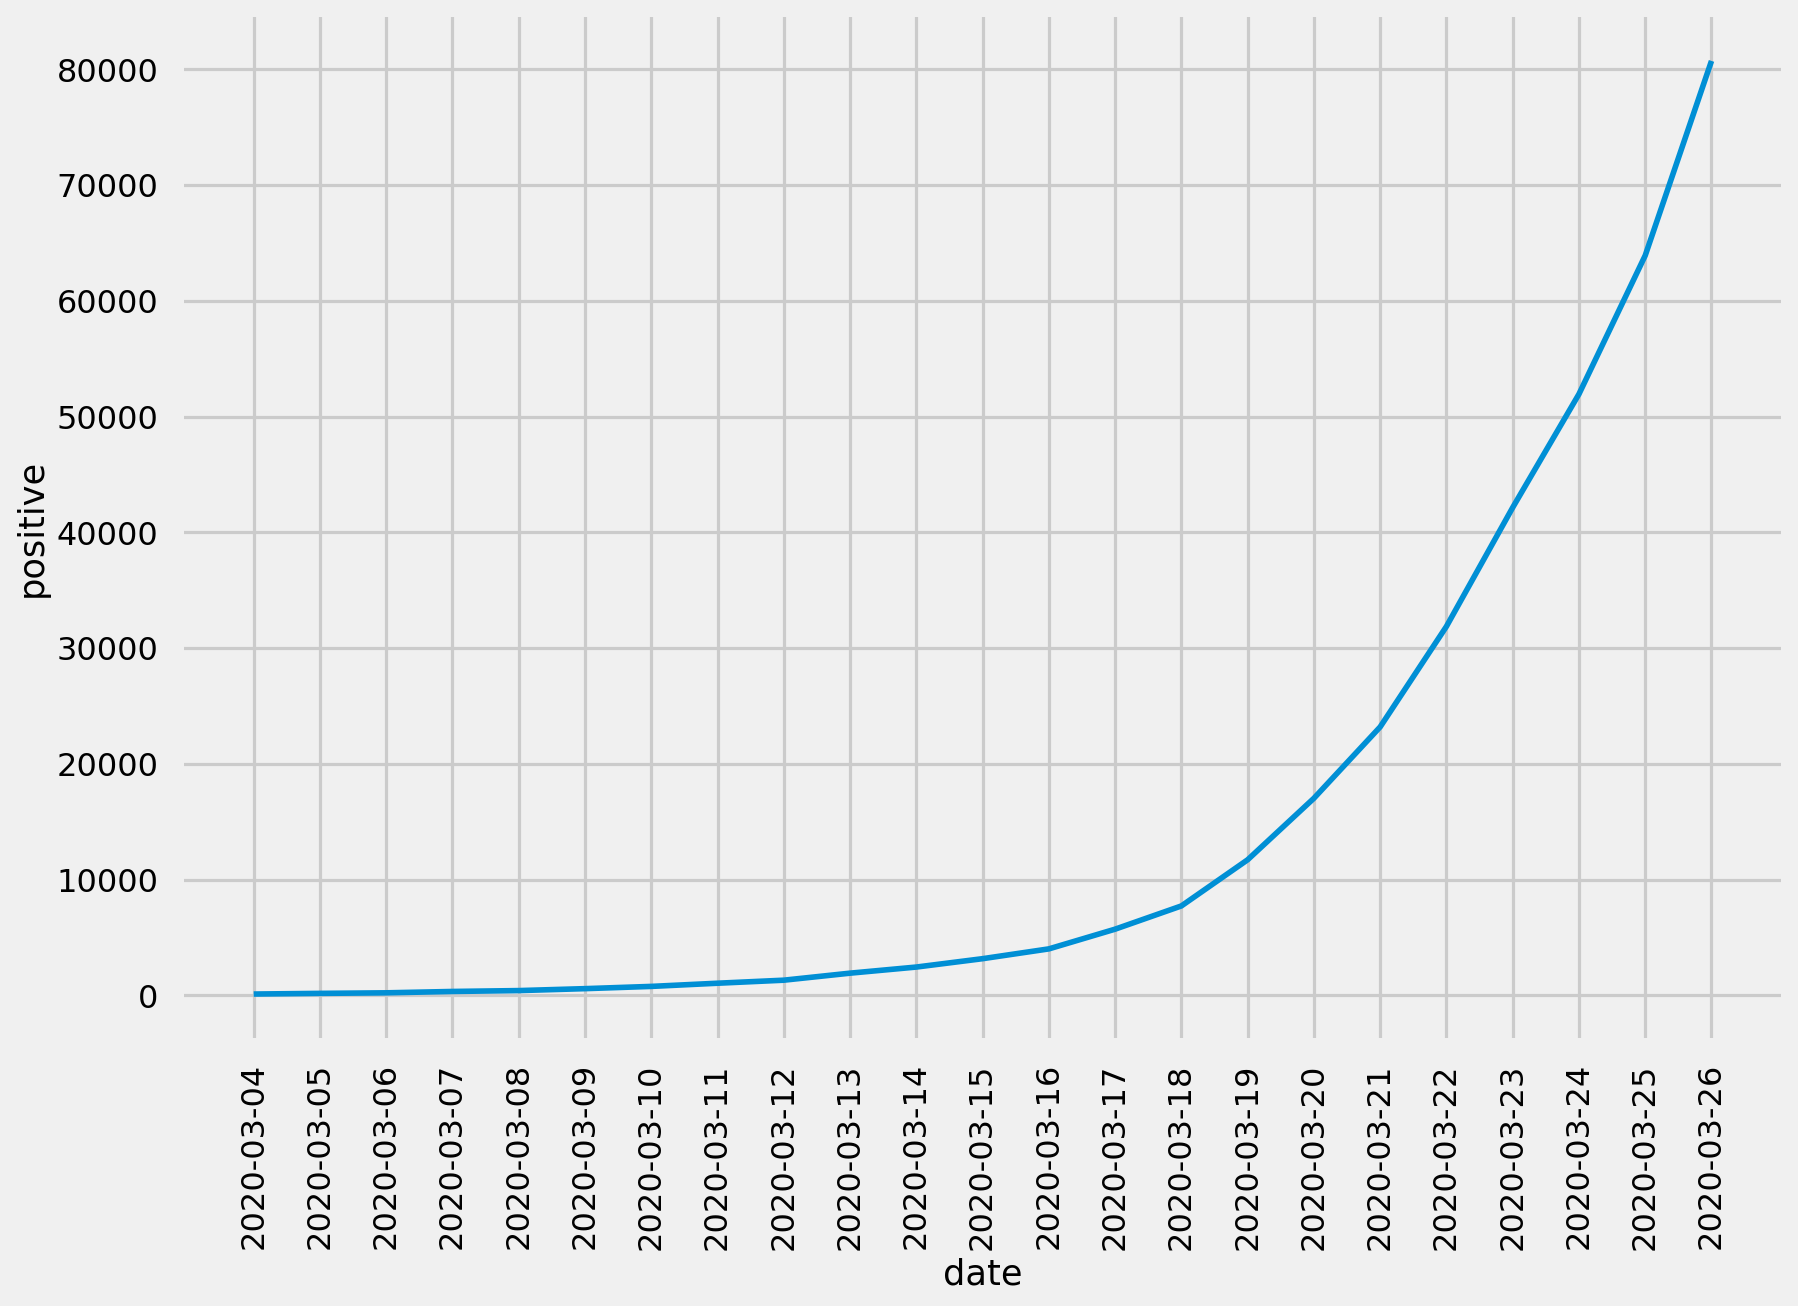

In [14]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  data=df_us)
ax.set(xticks=df_us.date.values)
plt.xticks(rotation=90)
plt.show()

# California Positive Cases

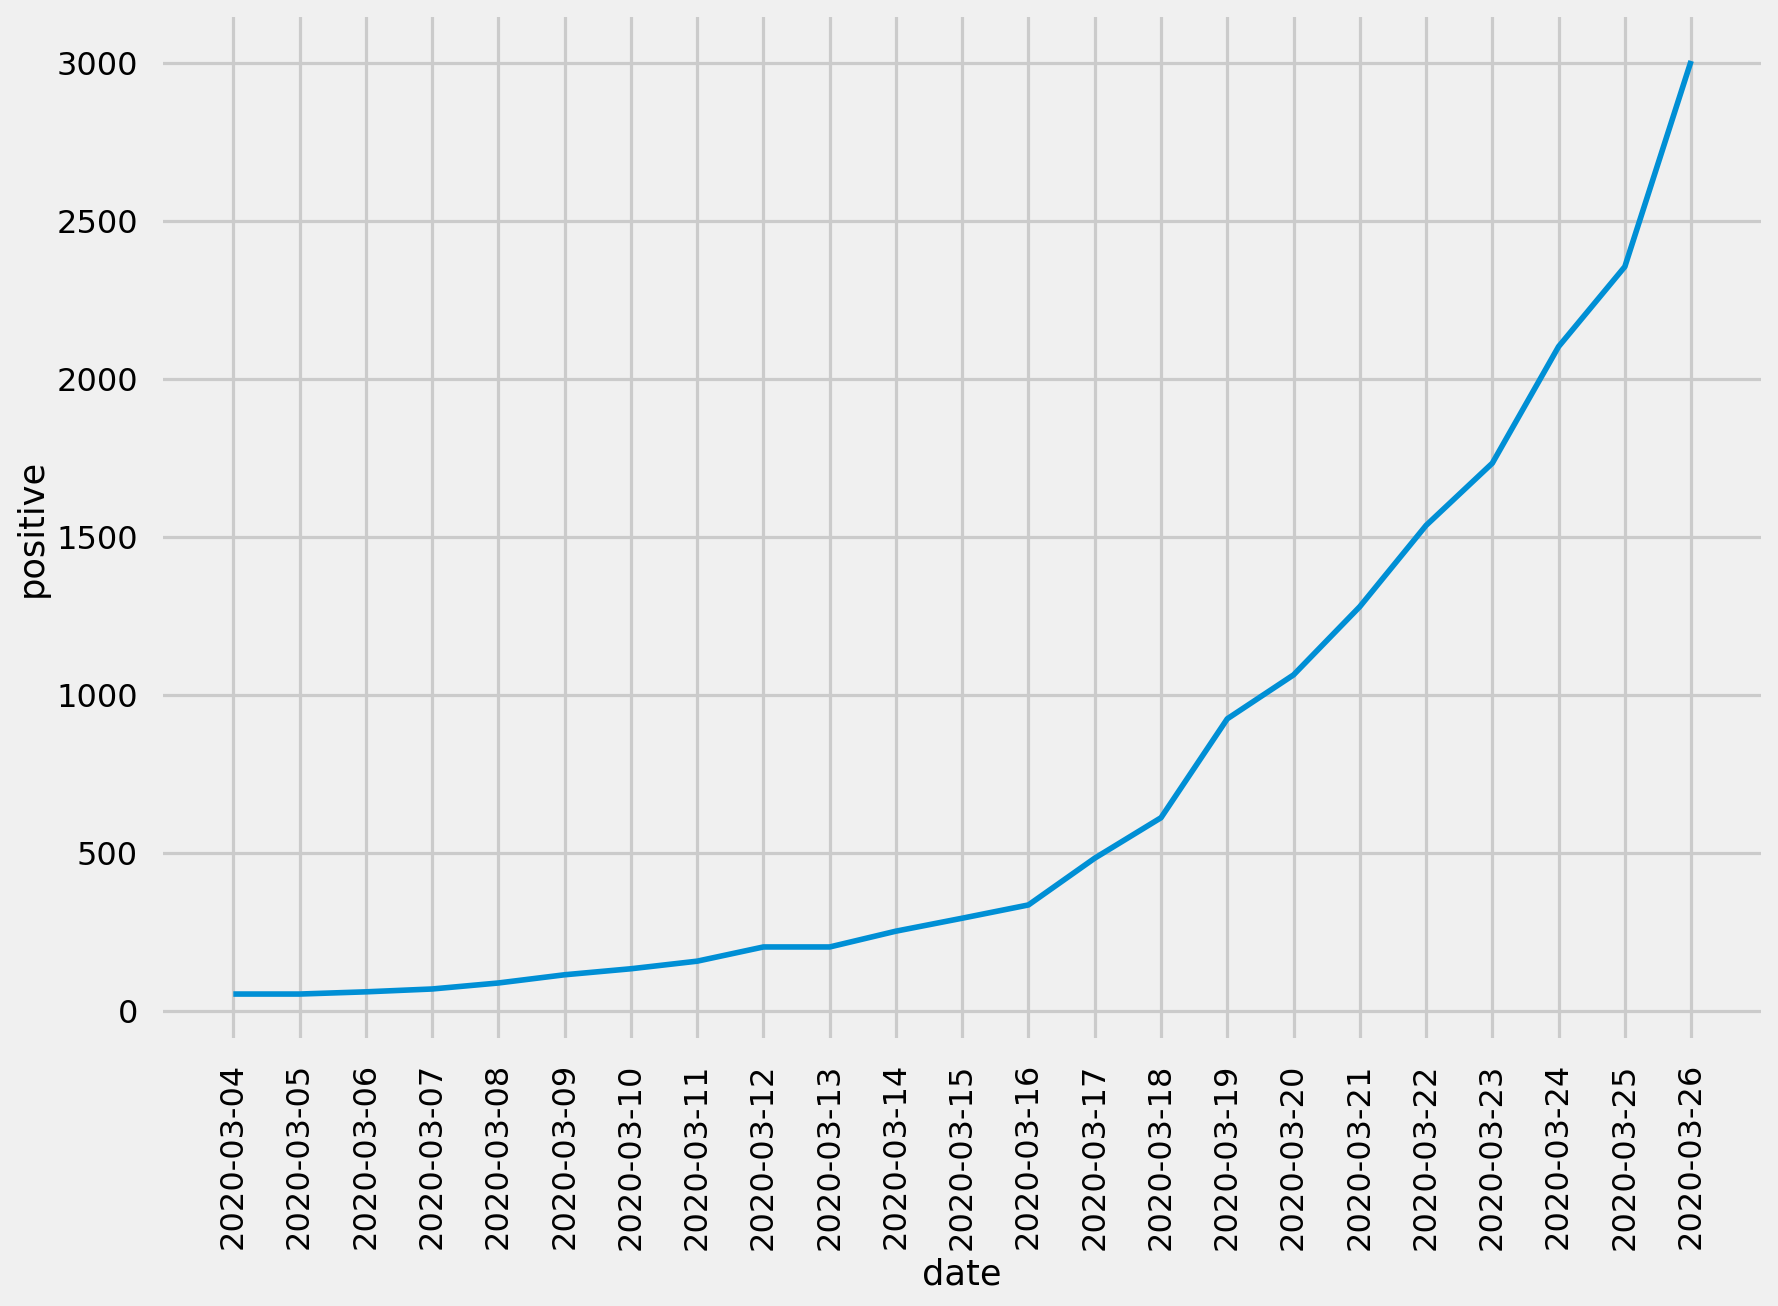

In [15]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
plt.show()

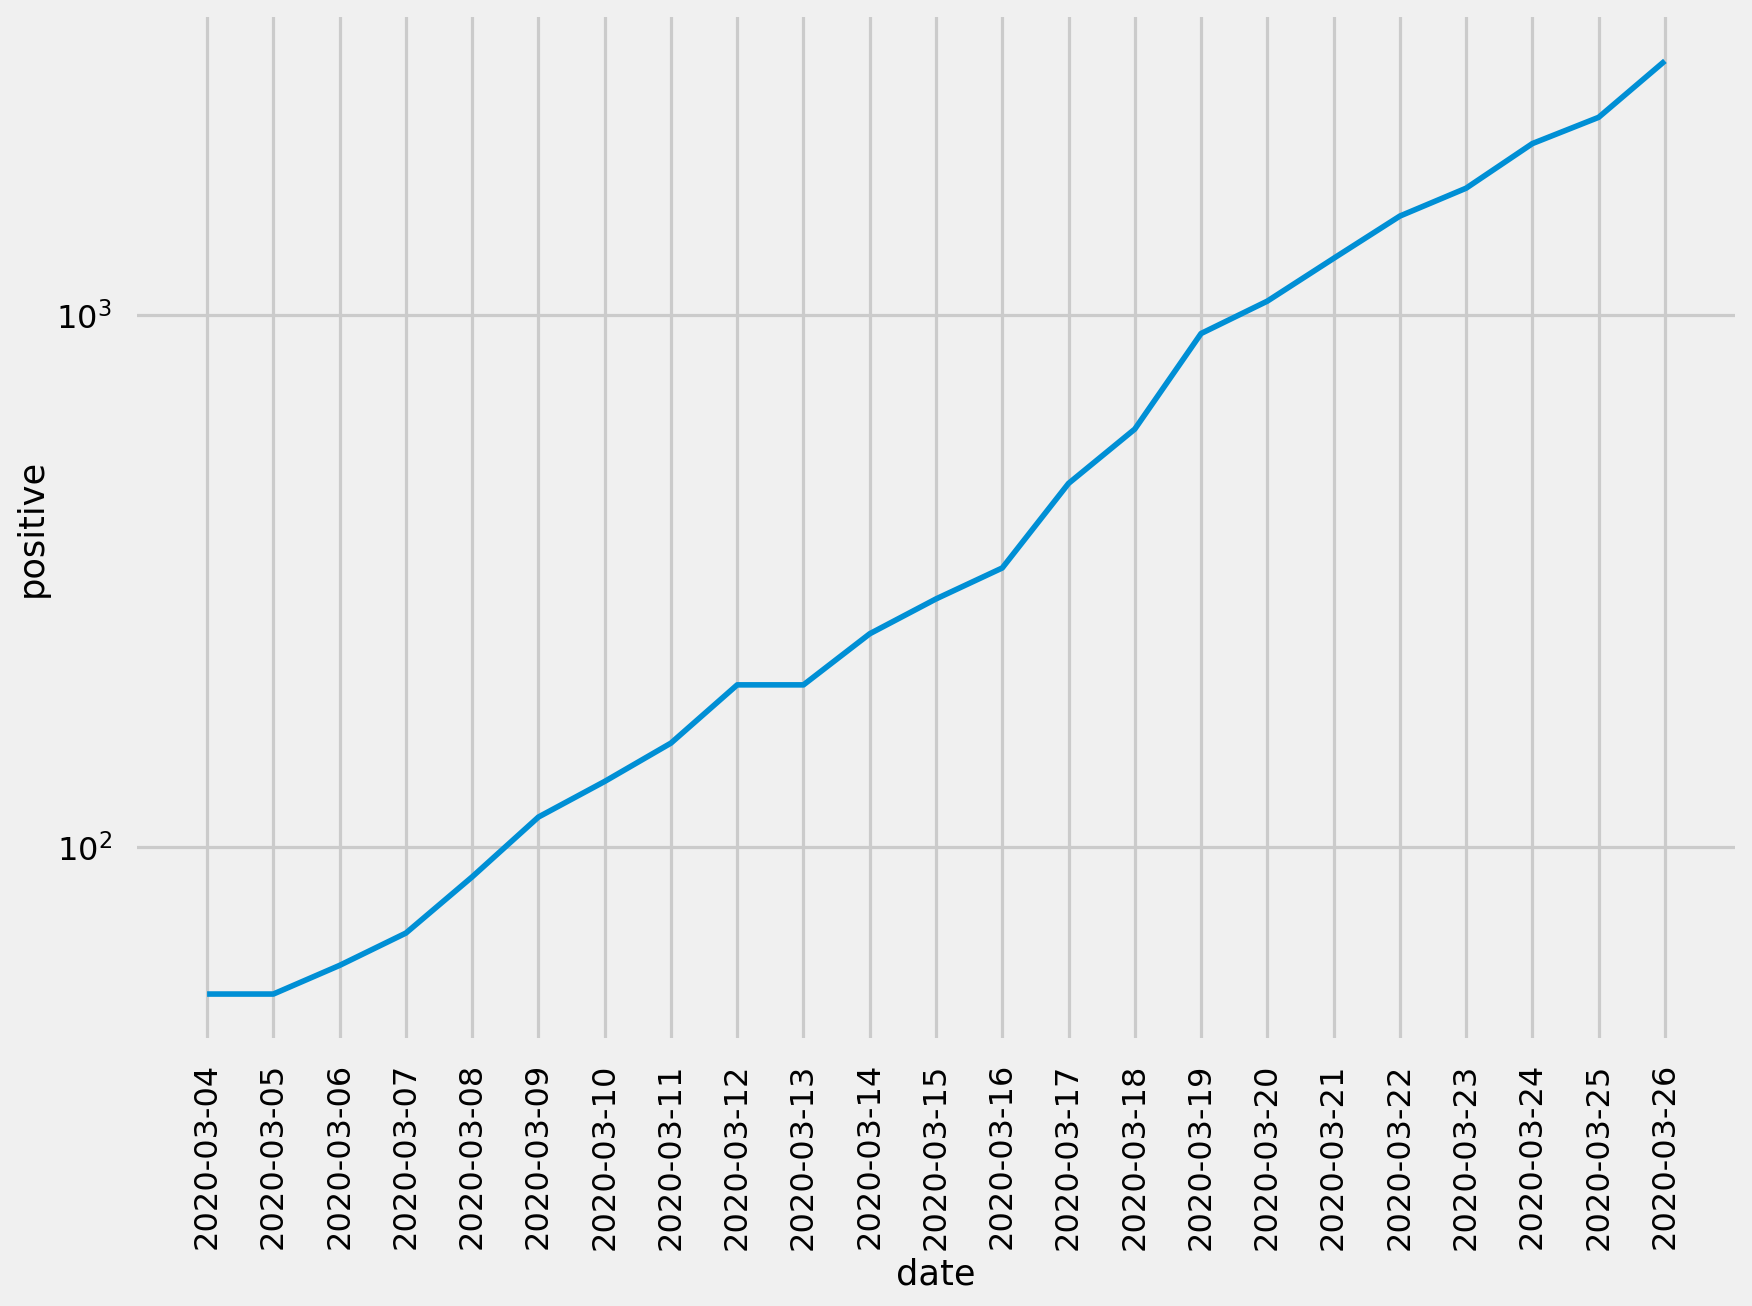

In [16]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

## Positive and Total Tests

## California

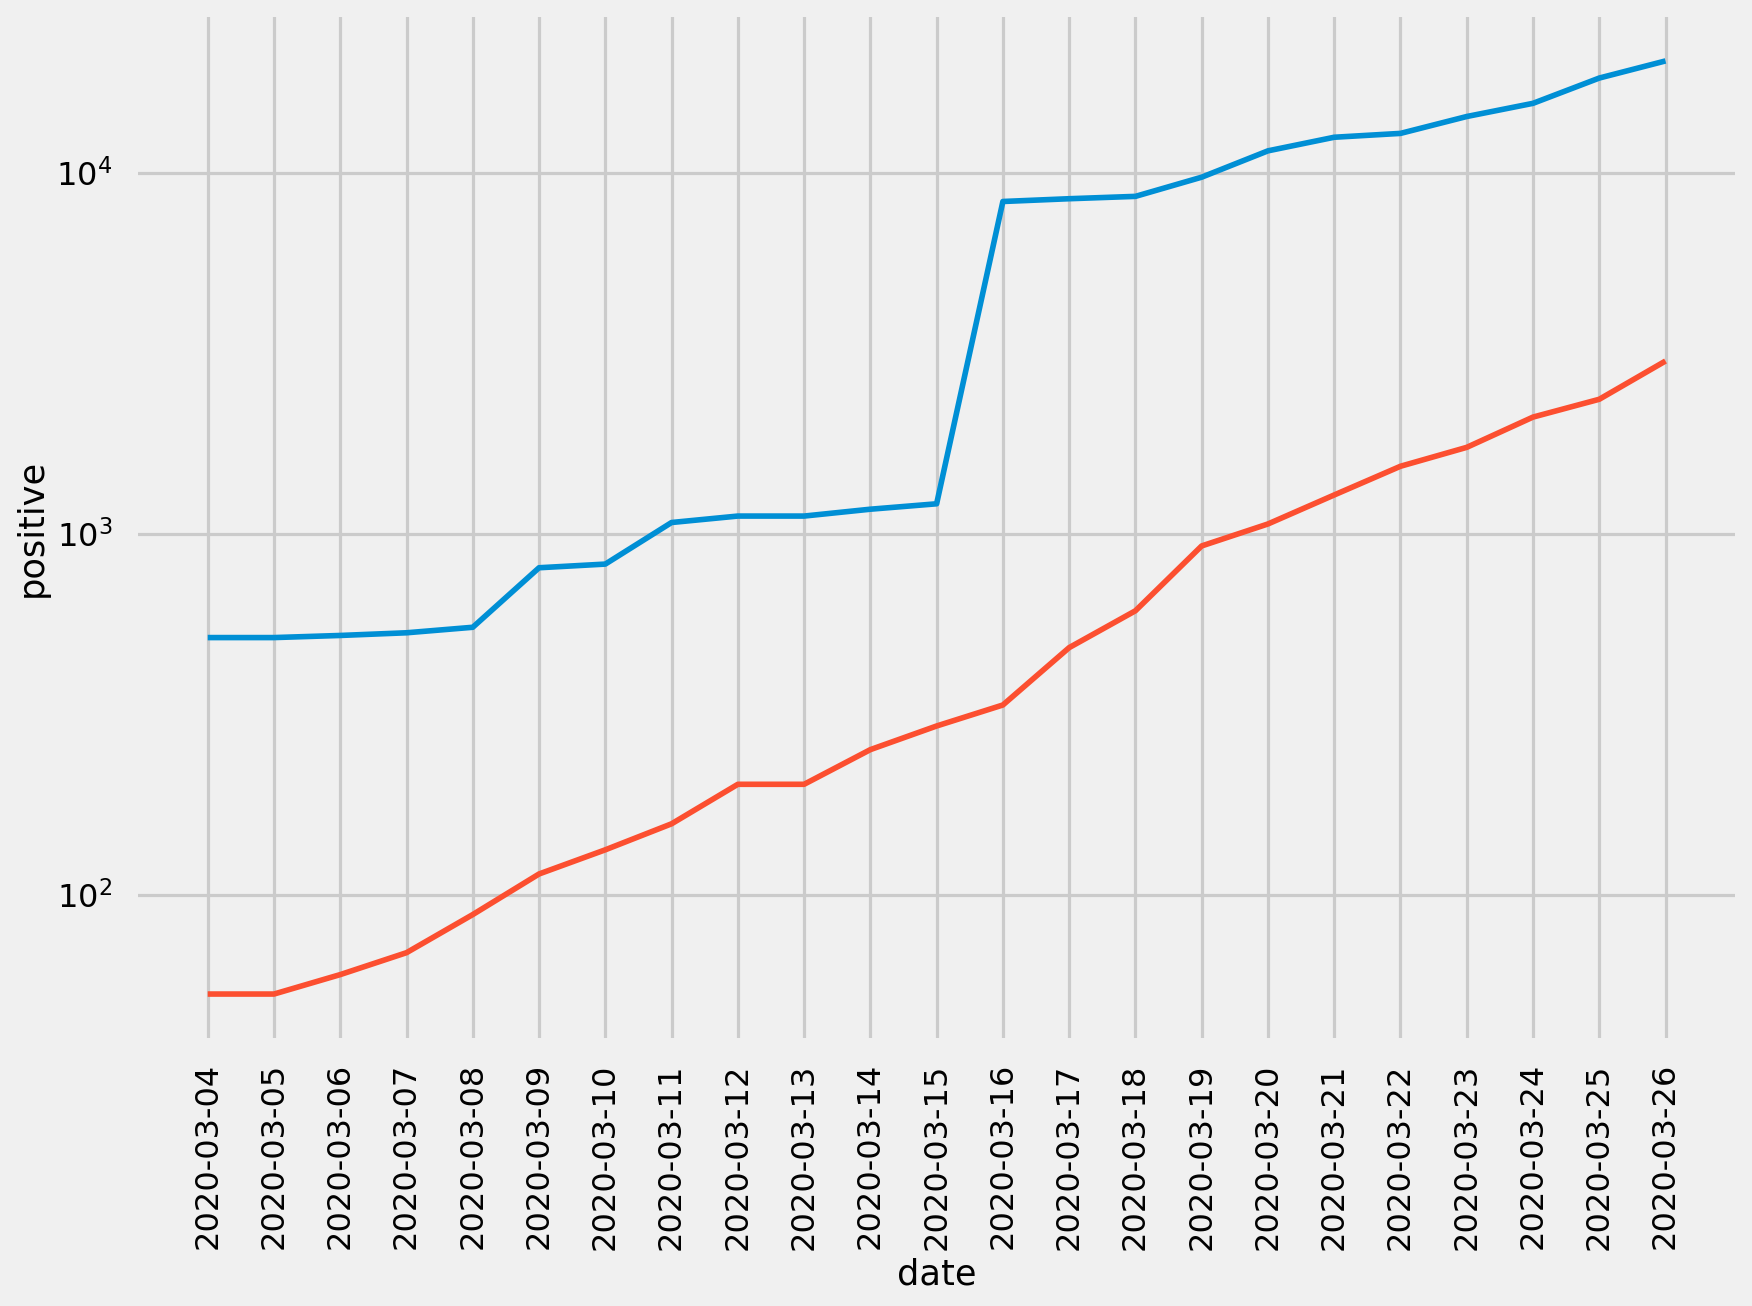

In [17]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "CA"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

## New York

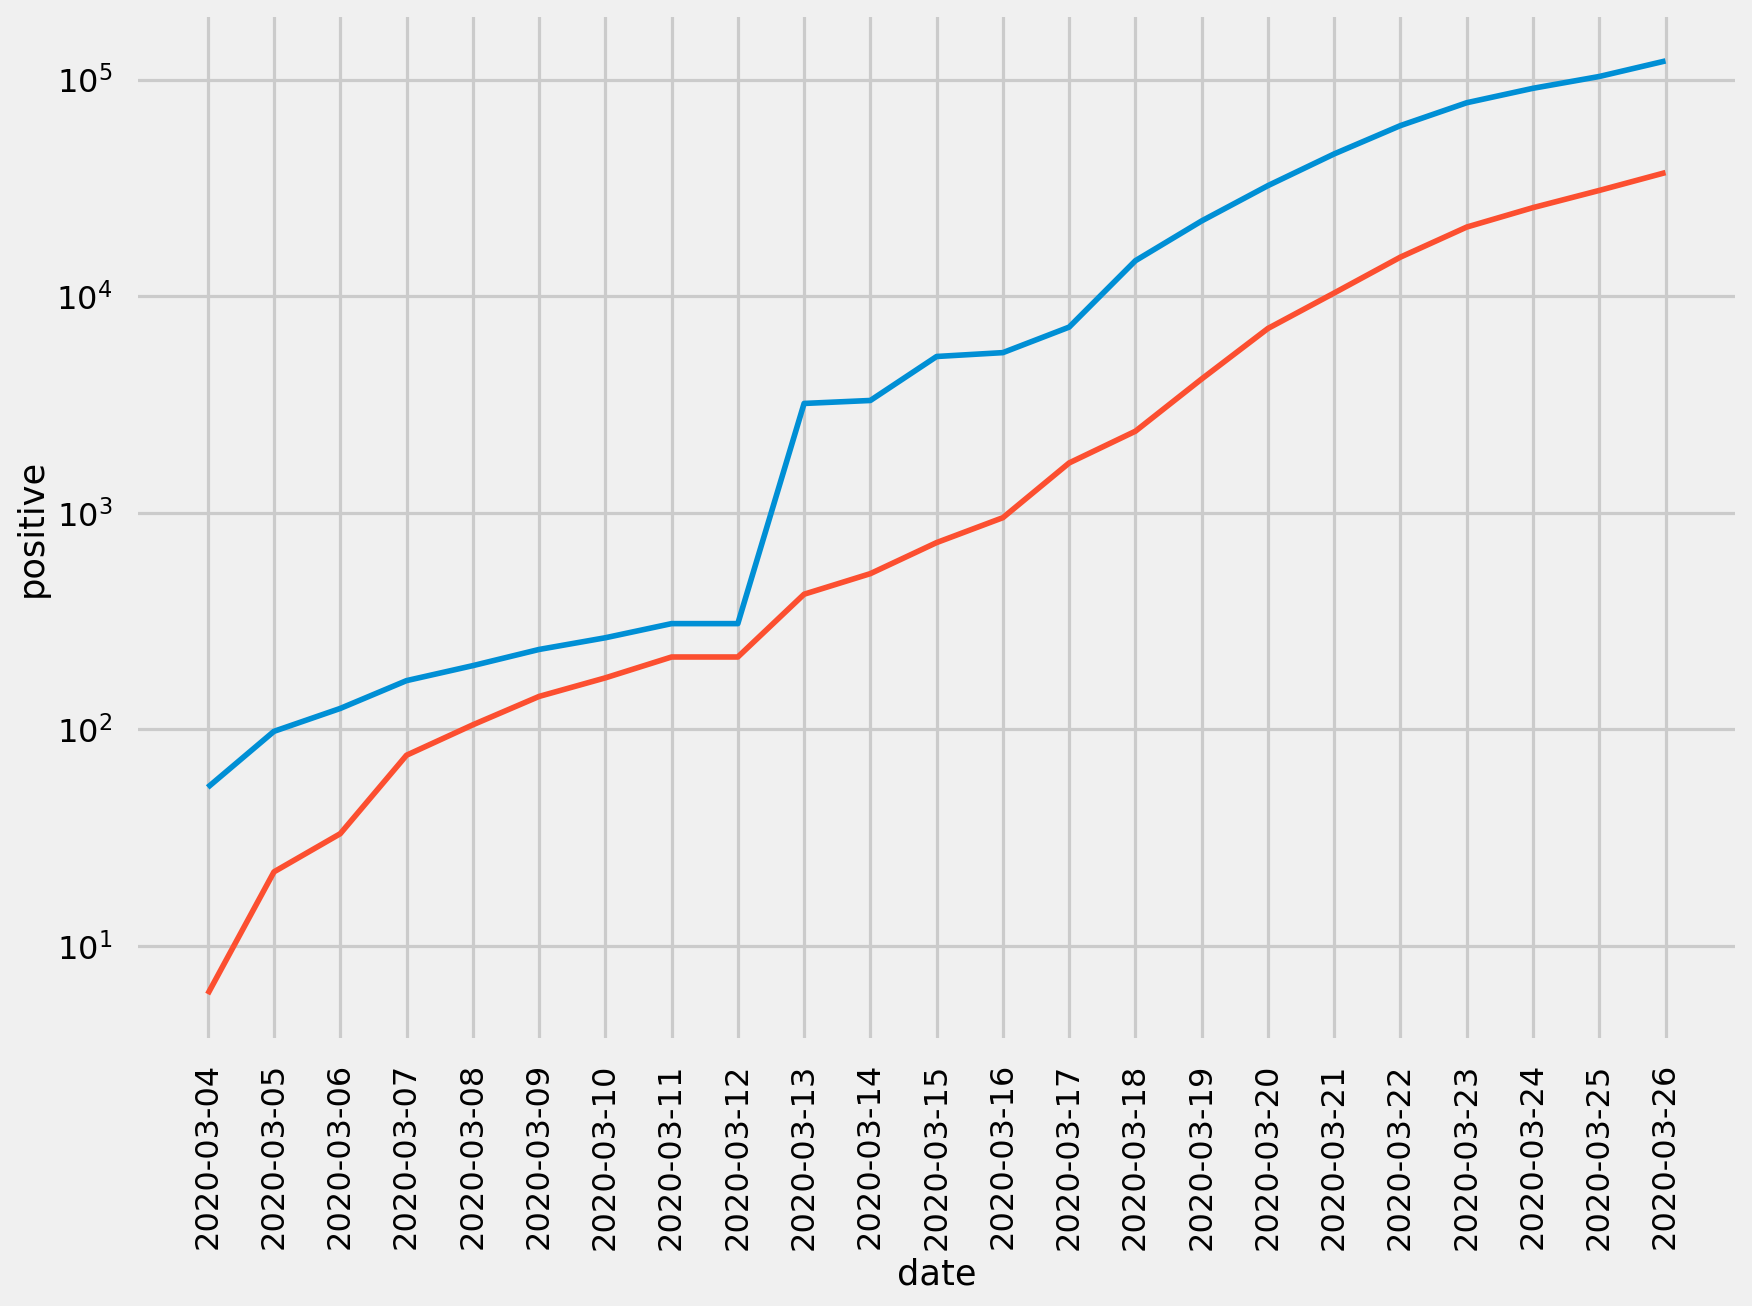

In [18]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "NY"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "NY"'))
ax.set(xticks=df_states.query('state == "NY"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

# Top 10 States

In [19]:
latest_date = df_states['date'].max()
top_states = df_states.query('date == @latest_date').sort_values(by='positive', 
                                                    ascending=False).state.head(10).tolist()
df_top_states = df_states.query('state == @top_states')
top_states

['NY', 'NJ', 'CA', 'MI', 'WA', 'IL', 'MA', 'FL', 'LA', 'PA']

In [20]:
df_states.query('date == @latest_date').sort_values(by='positive', ascending=False)[['state', 'positive']]

,state,positive
727,NY,37258.0
662,NJ,6876.0
85,CA,3006.0
471,MI,2856.0
1018,WA,2580.0
300,IL,2538.0
406,MA,2417.0
193,FL,2355.0
386,LA,2305.0
815,PA,1687.0


# Top State Positive Cases (Log Scale)

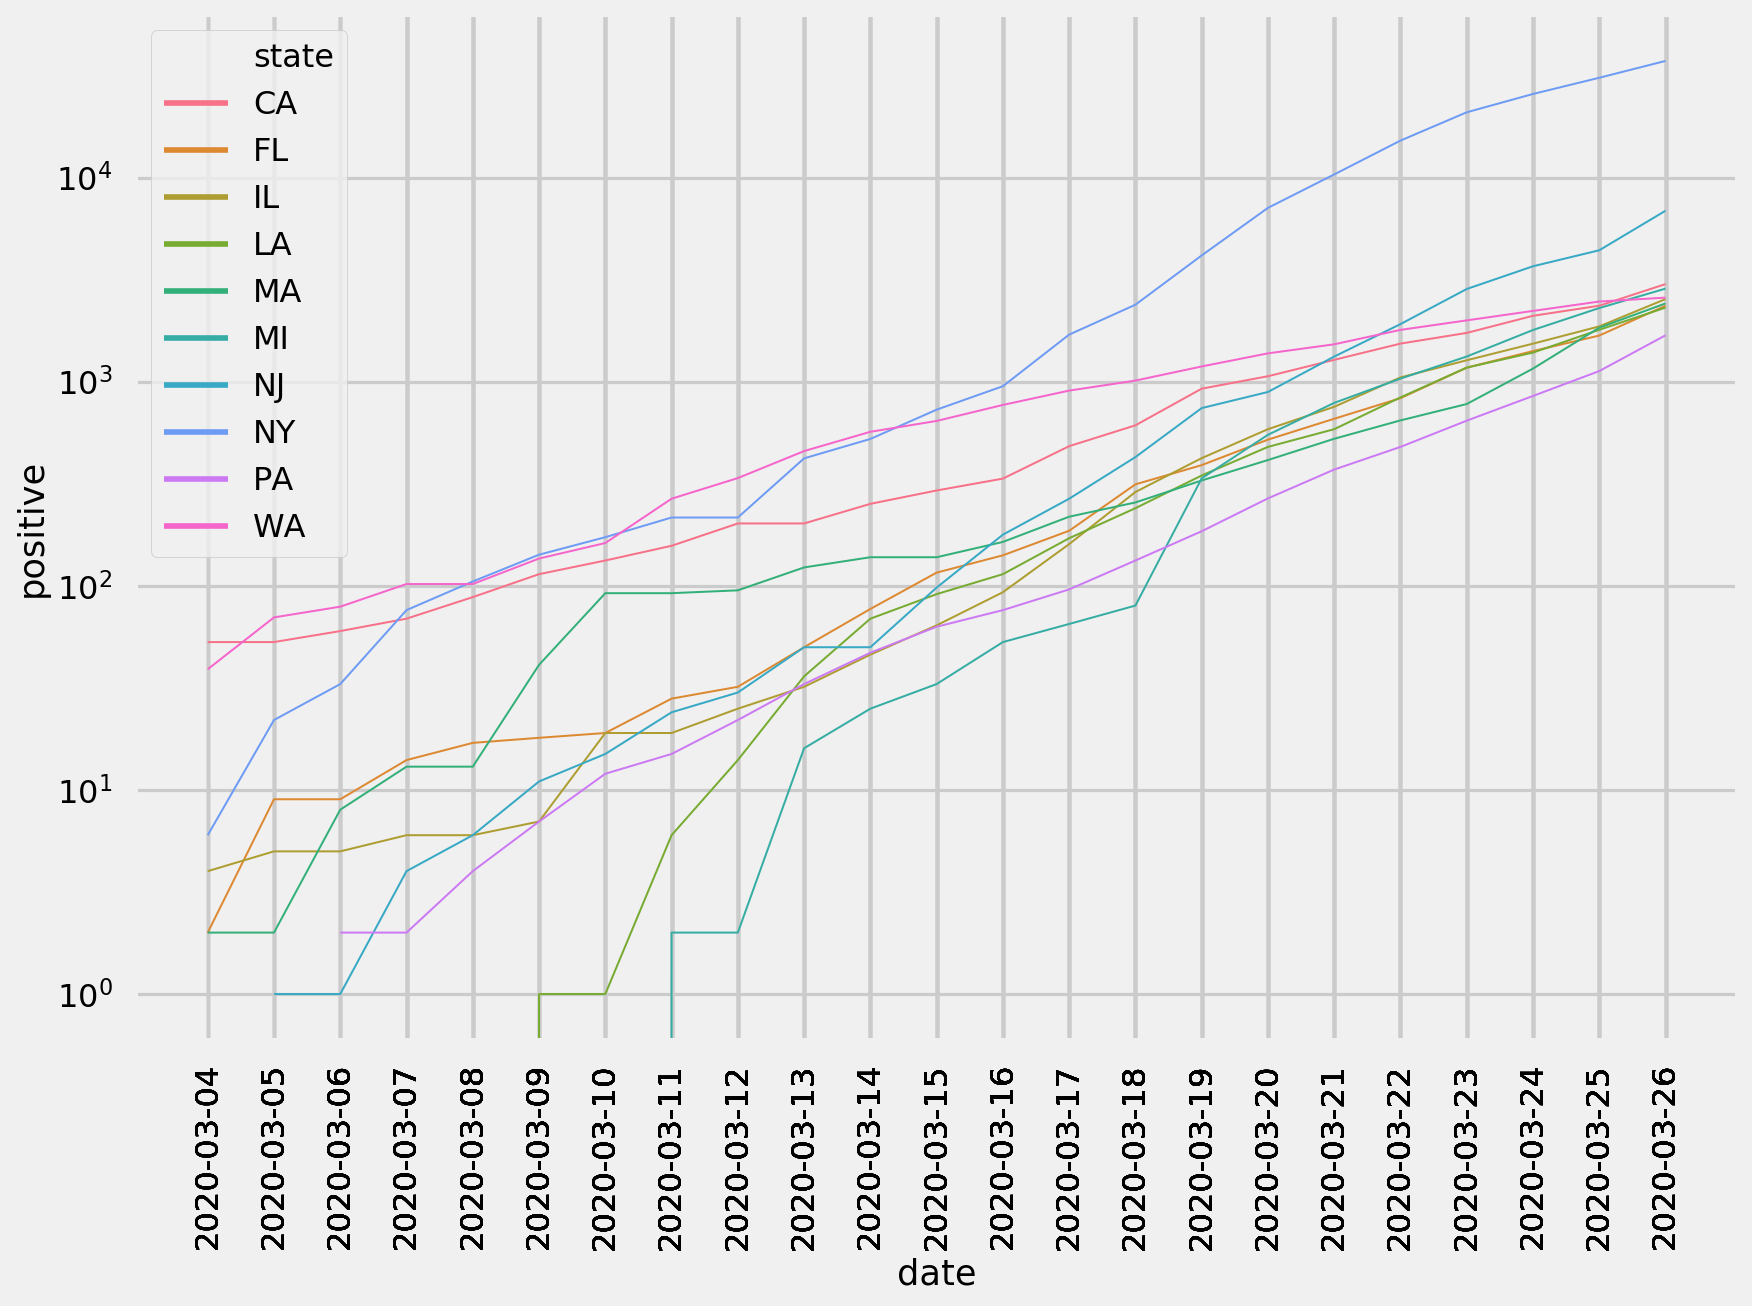

In [21]:
ax = sns.lineplot(x="date", y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases as Percent of Population (Log Scale)

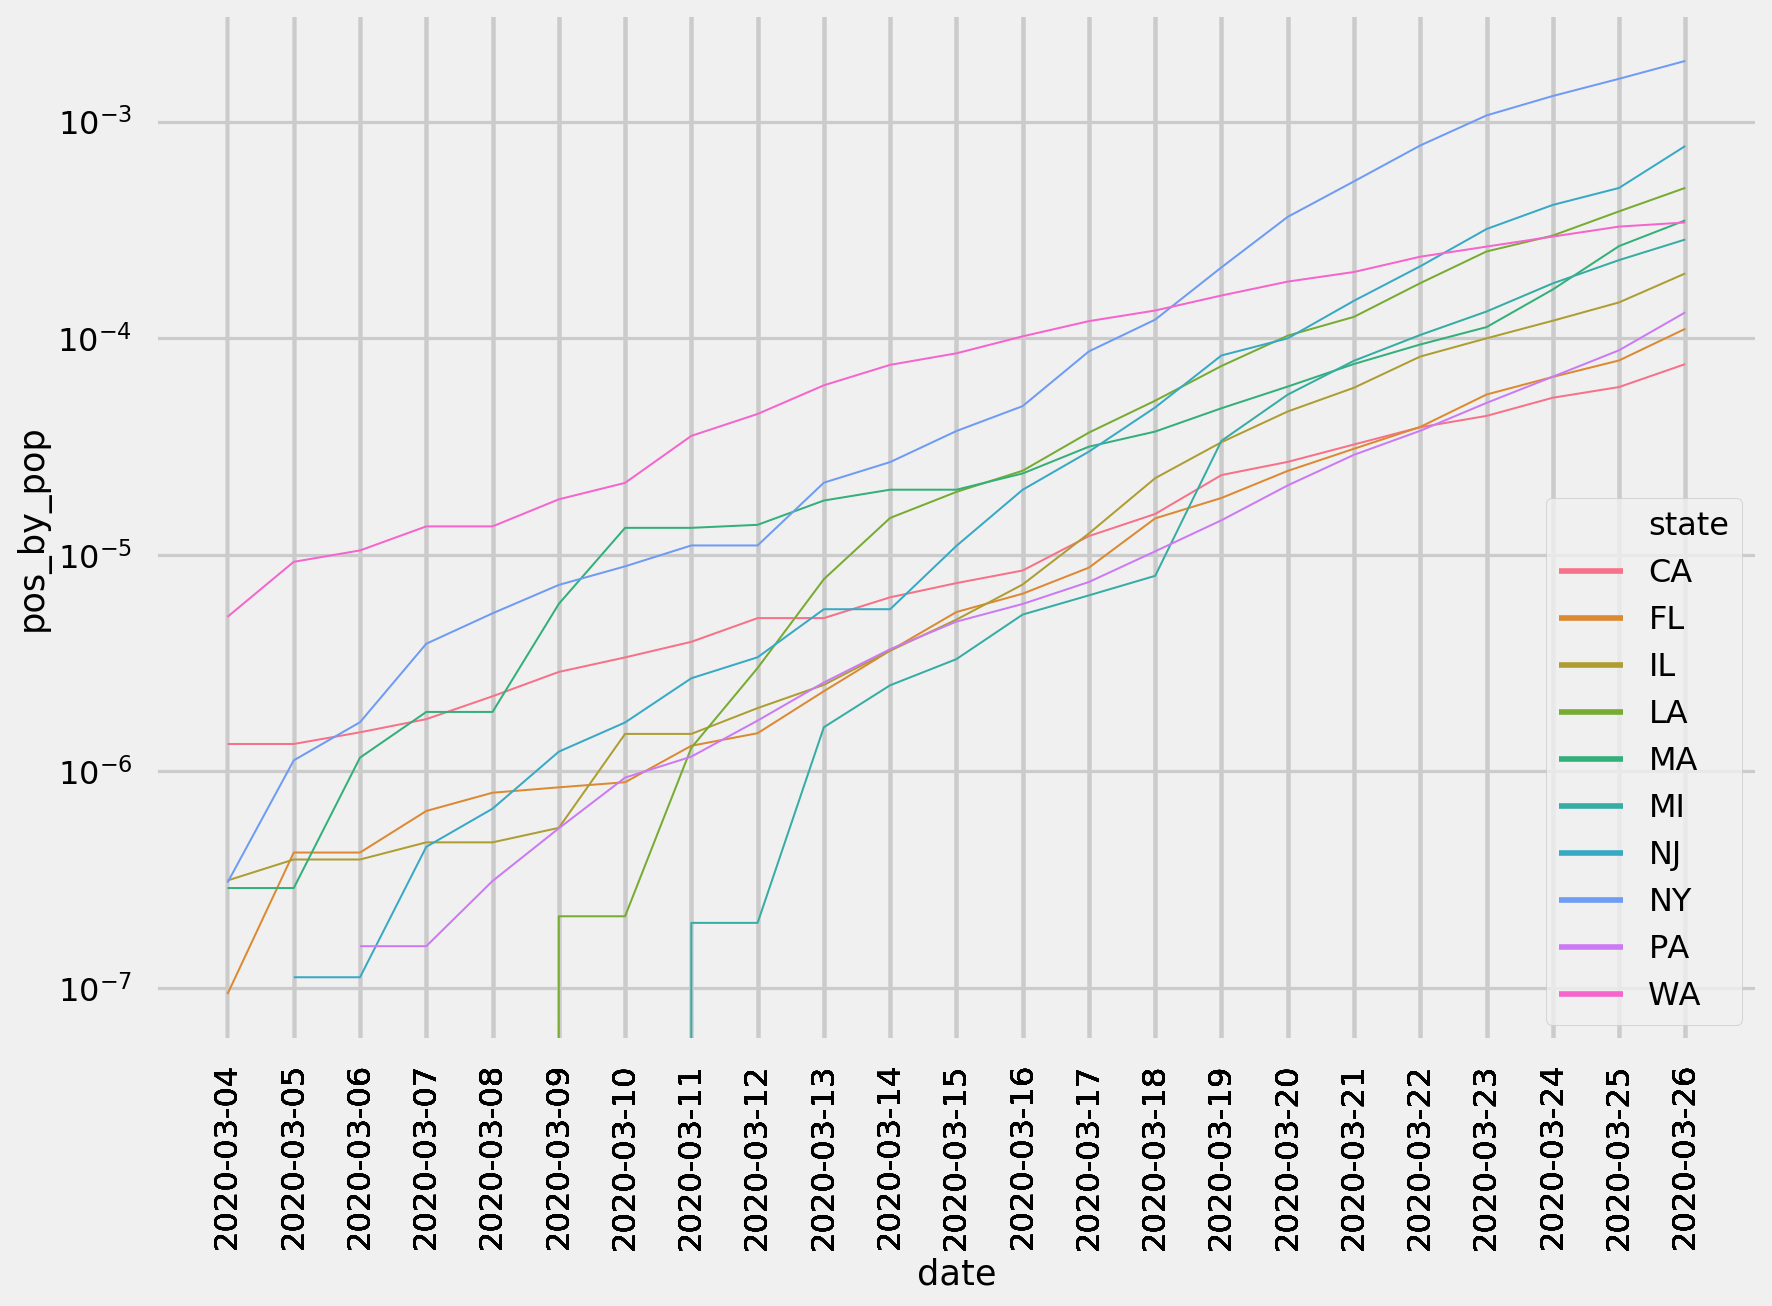

In [22]:
ax = sns.lineplot(x="date", y="pos_by_pop", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Percentage of Population Tested

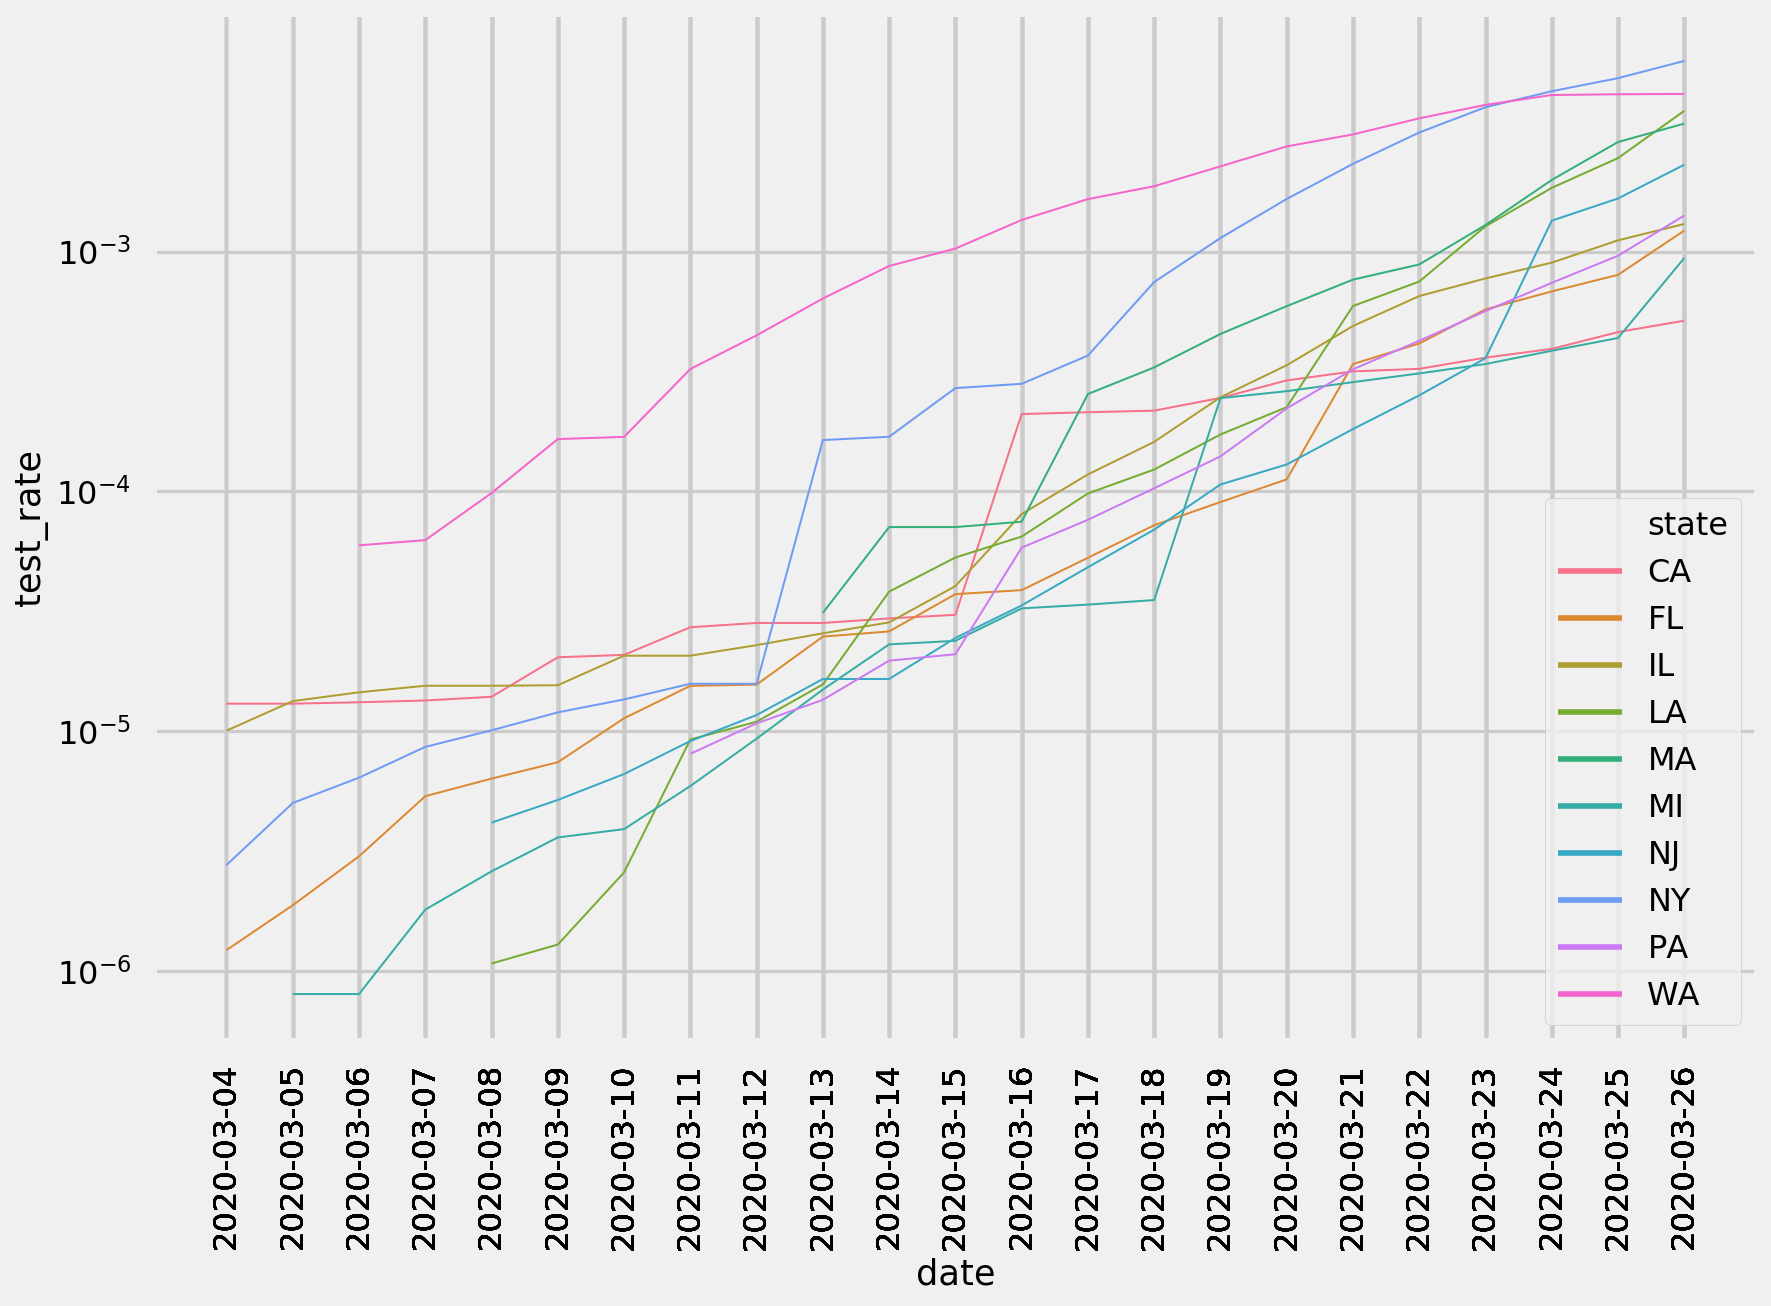

In [23]:
ax = sns.lineplot(x="date", y="test_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()